In [32]:
using LightGraphs
using Plots
using GraphRecipes
using Random
using LinearAlgebra
using Images
using SimpleWeightedGraphs

In [33]:
X = Random.rand(1:50,25,25)

25×25 Matrix{Int64}:
 20   1  14  16  15  42  39   5  38  …  14  48  44   4  13  46  21  47  23
 45   3  16  29  50  29  47  14   8     42  45   6   7  35  30   6  13  47
 37  25  19  41  25   2  17  31   3      8  48  39  16   7  28   7  20  12
  1  23  32  15  34  27  31  39  25     17  40  22  13  48  37   3  37  28
 30  10  35  17   7  28  13  43  13      4   5  49  20  45   9  48  16  12
 50   5  10  49  47  22  43  23  16  …  39  31  14  13   5  36  43  30  45
 27  12  25   7  49  28   8   6  15     33  18  46  50  12  37  22  33  45
 29   6  36  49  36  16   6   7  26     15  23  40  46   4   1  34  48  12
  2   7  36  24  35  41   9   5  14     11  10   3  45  40  22  41  47  26
 47  26  37  12  25  17  39  36  35     28  14  33  18  24  20  24  30  12
  8  35  50  19  47  22  23  29  11  …  34  19  26   7  39   9   9  16  45
 27  38  30  42  25  18  35  40  47     12  49  14  37  41  24  17   7  32
 15  42  37   2  10  44  35  21   4     38  18  50  47  18   5  38  22  38
 48 

In [34]:
function euclideanDistance(P1,P2)
    sum = 0
    for (index,coord) = enumerate(P1) 
        sum += (coord-P2[index])^2
    end
    return(sqrt(sum))
end

euclideanDistance (generic function with 1 method)

In [35]:
function createEpsilon(X,ϵ)
    line,column = size(X)
    output=zeros(size(X))
    for i=1:line
        for j=1:line
            if(i != j)
                euc = euclideanDistance(X[i,:],X[j,:]) 
                if(euc>ϵ)
                    output[i,j] =euc
                end
            end
        end
    end
    return output
end

E = createEpsilon(X,100)

25×25 Matrix{Float64}:
   0.0    108.826  102.25     0.0    …  102.387  132.77     0.0      0.0
 108.826    0.0    100.886    0.0       107.294  116.228  102.044  113.494
 102.25   100.886    0.0      0.0       110.354  109.43     0.0      0.0
   0.0      0.0      0.0      0.0       110.39     0.0      0.0      0.0
 112.69   128.67   111.526  105.622       0.0      0.0    104.943  121.215
   0.0      0.0    101.509  110.752  …    0.0    125.208  100.812  108.899
   0.0    103.213  104.293  107.689     101.612  107.023    0.0      0.0
 100.155  127.805    0.0    123.539     111.49   129.858  100.573  106.042
 107.396  120.196  127.824    0.0       117.085  109.27     0.0    115.499
   0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 107.903    0.0      0.0      0.0    …    0.0      0.0      0.0      0.0
 107.958    0.0      0.0      0.0         0.0    112.477    0.0    107.0
 123.033  120.698  107.135  103.267     101.755    0.0      0.0    109.211
   0.0    102.83

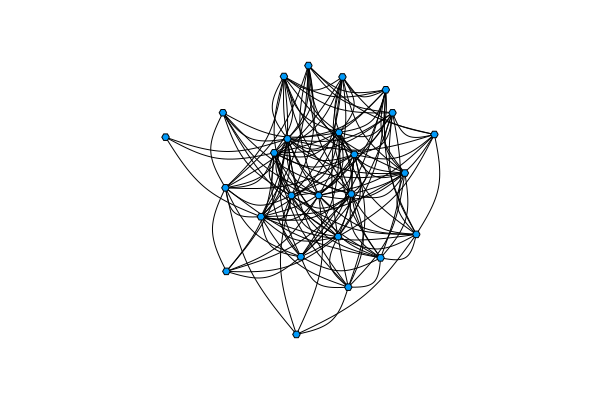

In [36]:
g = SimpleWeightedGraph(E)
graphplot(g)

In [37]:
function mutualKNearest(X,k)
    line,column = size(X)
    output = zeros(size(X))
    neighbour = zeros(size(X))
    for i = 1:line
        for j = 1:line
            if(i != j)
                neighbour[i,j] = euclideanDistance(X[i,:],X[j,:])
            end
        end
    end
    sorted = zeros(size(X))
    for i = 1:line
        sorted[i,:] = sort(neighbour[i,:])
    end
    sorted = sorted[:,2:k+1]
    sortedInt = zeros(Int,size(sorted))
    for i = 1 : line
        sortedInt[i,:] = [Int(findfirst(x -> x == l, neighbour[i,:])) for l in sorted[i,:]]
    end
    for i = 1:line
        for j = 1:k
            index = sortedInt[i,j]
            if(i in sortedInt[index,:])
                output[i,index] = neighbour[i,index]
            end
        end
    end
            
                
    return(output)
end
M = mutualKNearest(X,5)

25×25 Matrix{Float64}:
  0.0      0.0      0.0      0.0     …   0.0      0.0      0.0     74.8331
  0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
  0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
  0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
  0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
  0.0     75.1266   0.0      0.0     …   0.0      0.0      0.0      0.0
  0.0      0.0      0.0      0.0         0.0      0.0      0.0     86.267
  0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
  0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
  0.0      0.0     79.0569   0.0         0.0      0.0     79.9562  75.9013
  0.0     90.9285   0.0     79.8999  …   0.0      0.0     86.5043   0.0
  0.0      0.0      0.0     82.5227     86.9022   0.0      0.0      0.0
  0.0      0.0      0.0      0.0         0.0     92.0706   0.0      0.0
  0.0      0.0     68.542    0.0 

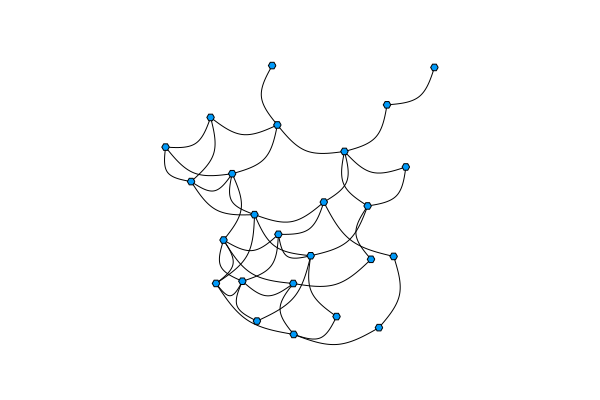

In [38]:
g = SimpleWeightedGraph(M)
graphplot(g)

In [39]:
function kNearest(X,k)
    #first we compute the neighbour distance list
    line,column = size(X)
    output = zeros(size(X))
    for i = 1:line
        neighbour = zeros(line)
        for j = 1:line
            if(i != j)
                neighbour[j] = euclideanDistance(X[i,:],X[j,:])
            end
        end
        sorted = sort(neighbour)[2:k+1]#as we delete the self-edge problem, we need to look for one more point
        found = [findfirst(x->x == l, neighbour) for l in sorted ]
        for index in found
            output[i,index] = neighbour[index]
            output[index,i] = neighbour[index]
        end
    end
    return output
end

kNearest (generic function with 1 method)

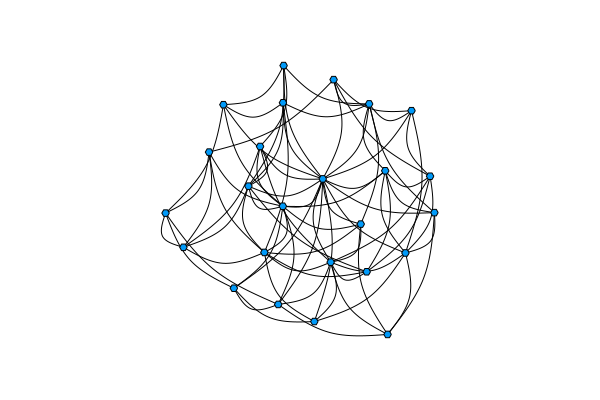

In [41]:
kn = kNearest(X,5)
g = SimpleWeightedGraph(kn)
graphplot(g)

In [43]:
function Gaussian(x1,x2,σ)
    return exp((-norm(x1-x2)^2)/(2*σ^2))
end

Gaussian (generic function with 1 method)

In [51]:
function fullyConnected(X,σ)
    line,column = size(X)
    output = zeros(size(X))
    for i = 1 : line
        for j = 1 : line
            if(i != j)
                output[i,j] = Gaussian(X[i,:],X[j,:],σ)
            end
        end
    end
    return output
end
F = fullyConnected(X,100)

25×25 Matrix{Float64}:
 0.0       0.553137  0.592888  0.622912  …  0.414203  0.628324  0.755784
 0.553137  0.0       0.601156  0.692879     0.508927  0.594134  0.525161
 0.592888  0.601156  0.0       0.659285     0.549498  0.64246   0.608931
 0.622912  0.692879  0.659285  0.0          0.677972  0.665478  0.616529
 0.529962  0.43701   0.536923  0.572467     0.613025  0.576575  0.479673
 0.609358  0.754123  0.597381  0.541561  …  0.456645  0.601608  0.552694
 0.614959  0.587047  0.580509  0.559982     0.564001  0.643779  0.689285
 0.605591  0.441887  0.621885  0.466219     0.430353  0.603053  0.569925
 0.561749  0.48561   0.441777  0.608688     0.550461  0.648885  0.513246
 0.652953  0.622756  0.731616  0.710846     0.648917  0.726403  0.749724
 0.558696  0.661398  0.634956  0.72673   …  0.626097  0.687874  0.627162
 0.558361  0.614897  0.609266  0.711415     0.531235  0.639256  0.564142
 0.469142  0.482681  0.563324  0.586724     0.654522  0.636768  0.550818
 0.66701   0.589371  0.79065

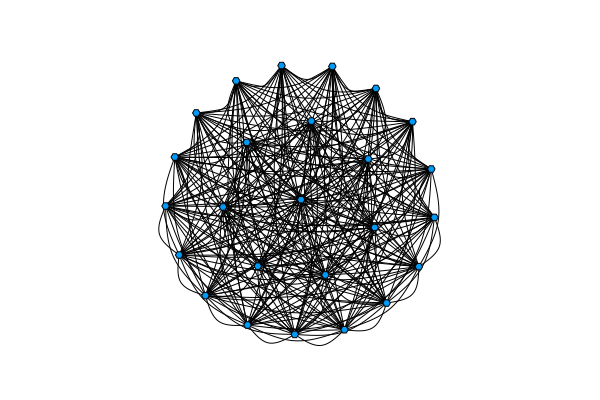

In [52]:
g = SimpleWeightedGraph(F)
graphplot(g)